<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/TimeSeries_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
from google.colab import files
uploaded = files.upload() #   "day.csv"

Saving day.csv to day (1).csv


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

%matplotlib inline



#  Here we are using a dataset on the number of bicycles checkouts from a bike sharing service for a 3 month period

In [ ]:
# load in data "day.csv"
data = read_csv("day.csv", header=0, parse_dates=[1], index_col=1, squeeze=True)#read data file, make datetime column the index
data.head()
# preview your data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0


In [ ]:
# choose your column : cnt
series = data['cnt']
series.head()

dteday
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Name: cnt, dtype: float64

I'll perform a quick plot to understand/visualise what the data looks like.

Text(0, 0.5, 'CNT')

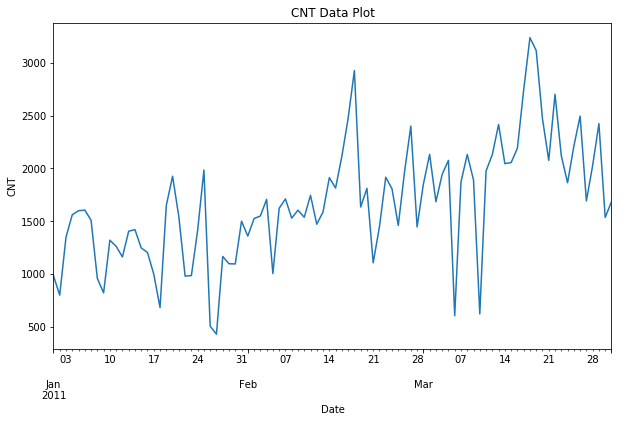

In [ ]:
# quick visualisation
pyplot.figure(figsize=(10,6))
pyplot.title('CNT Data Plot')

series.plot()

pyplot.xlabel('Date')
pyplot.ylabel('CNT')

I can see a general increase in the dataset which wI can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means I am going to try to take out the trend component: d = 1

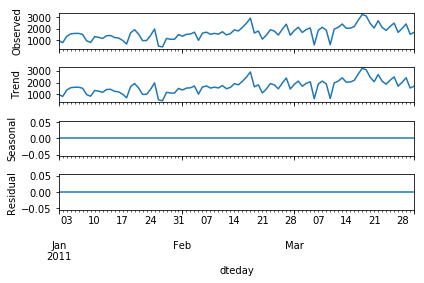

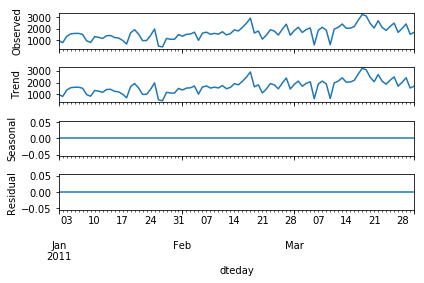

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(series, model='additive', freq=1).plot()

There is only a trend to the data. No seasonality.

## p, d, q (arima parameters)

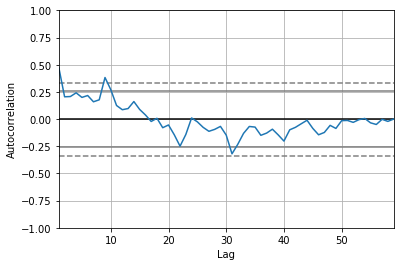

In [ ]:
# autocorrelate you data
autocorrelation_plot(series[1:60]) #plot autocorrelation using pandas autocorrelation function

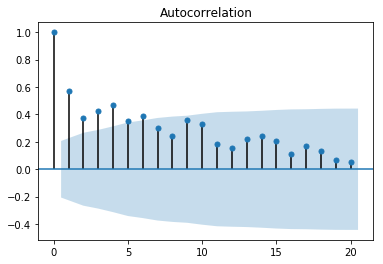

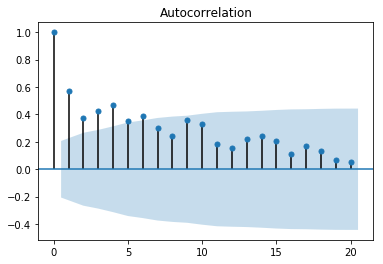

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import statmodel's autocorrelation
plot_acf(series) #plot autocorrelation using statsmodel's autocorrelation function

The gradual decline of the plot shows that the data is not stationary.

From this plot, we see that many values for the ACF are within 95% confidence interval for lags > 7, which suggests that our data has very little autocorrelation.

There are visible spikes above the blue region
Meaning there are correlations at lags 1, 2, 3, 4, 5 and 6.

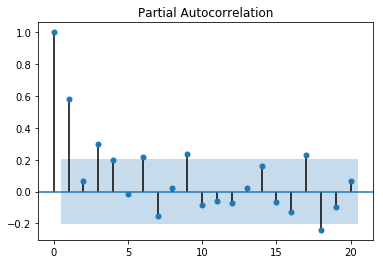

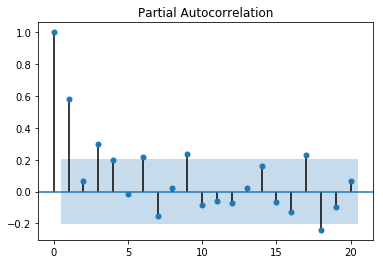

In [ ]:
#partial autocorrelation
plot_pacf(series)#plot partial autocorrelation using statsmodel

Get your pdq values to experiment with and fit the model

There are visible spikes above the blue region.

Meaning there are correlations firstly at lags 1, 3 and 9.



---

###The Model

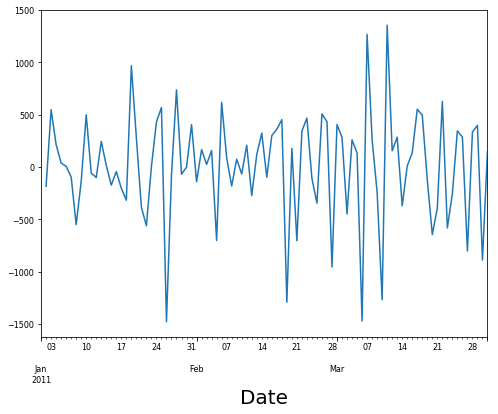

In [ ]:
#First start by Applying First order differencing
#Applying firstorder differencing
series.diff().plot(figsize=(8,6), fontsize=8)
pyplot.xlabel('Date', fontsize=20);

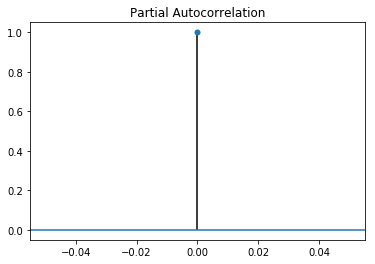

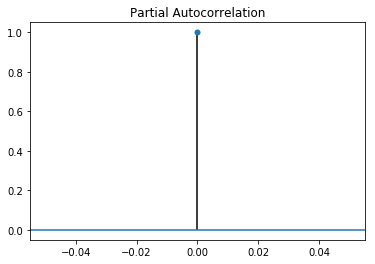

In [ ]:
plot_pacf(series.diff())

The above shows that differencing the model to the first order is just good enough.

In [ ]:
# fit the model
# model = ARIMA(series, order=(2,1,3)) # first model's AIC not too bad. But mean of -10
# model = ARIMA(series, order=(3,1,2)) # gave an error of non-stationary AR
# model = ARIMA(series, order=(1,1,2)) # AIC lower than first model, but mean of -8
# model = ARIMA(series, order=(1,1,1)) # Performs better on AIC and mean, but PACF still has correlation
# model = ARIMA(series, order=(3,1,1)) # Mean of -4. AIc as high as first model
# model = ARIMA(series, order=(6,1,1)) # Mean of 4. Highest AIC 
# model = ARIMA(series, order=(0,1,2)) # Low AIC and BIC, but high mean. Plenty correlation for PACF   
#increasing differencing to 2 lowers the mean
# model = ARIMA(series, order=(9,1,1)) # High AIC and BIC, mean of 4. Correlation count for PACF higher than AR = 1

model = ARIMA(series, order=(1,1,1))  
#1,1,1 is best fit. 
#Proven by the fact that the first time the lags cross the blue threshold, for both ACF and PACF were at lags of 1. 
#And it performs better across board on mean and low AIC & BIC

model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors


                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -665.899
Method:                       css-mle   S.D. of innovations            420.555
Date:                Tue, 16 Jul 2019   AIC                           1339.797
Time:                        03:43:20   BIC                           1349.752
Sample:                    01-02-2011   HQIC                          1343.809
                         - 03-31-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.2976      2.489      5.342      0.000       8.419      18.176
ar.L1.D.cnt     0.3250      0.102      3.178      0.002       0.125       0.525
ma.L1.D.cnt    -0.9999      0.032    -31.171    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


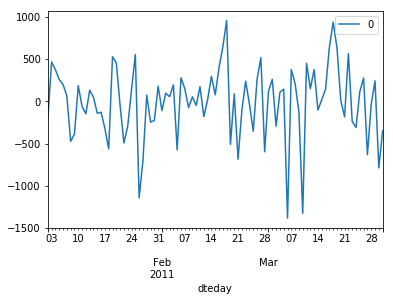

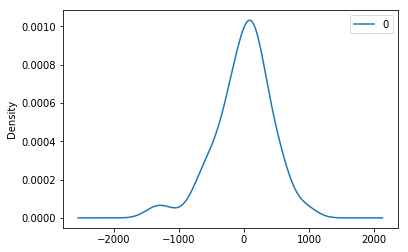

                 0
count    89.000000
mean     -5.787917
std     429.424926
min   -1379.860788
25%    -224.214625
50%      56.760993
75%     244.332595
max     959.064508


In [ ]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

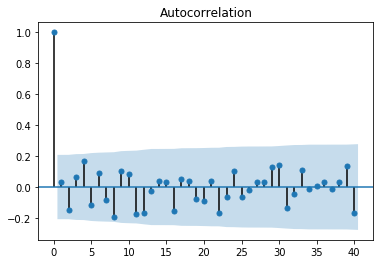

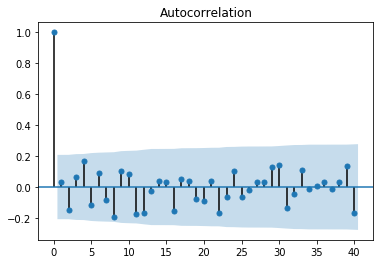

In [ ]:
plot_acf(model_fit.resid, lags=40) # confirm that correlations have been dealt with.

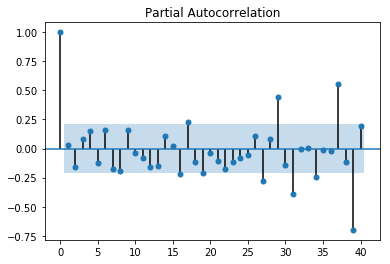

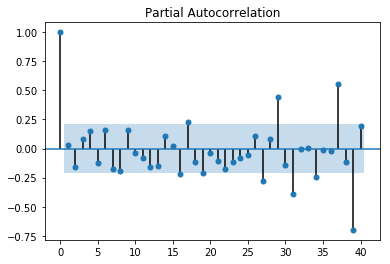

In [ ]:
plot_pacf(model_fit.resid, lags=40)

## Rolling Forecast
I now try to use the model to predict future responses.  

In [ ]:
# model prediction

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=1515.850679, expected=1851.000000
predicted=2052.179724, expected=2134.000000
predicted=1980.299332, expected=1685.000000
predicted=1705.635713, expected=1944.000000
predicted=2139.802206, expected=2077.000000
predicted=1912.430210, expected=605.000000
predicted=1159.164622, expected=1872.000000
predicted=2139.698816, expected=2133.000000
predicted=1655.513926, expected=1891.000000
predicted=1809.605134, expected=623.000000
predicted=1483.716260, expected=1977.000000
predicted=1696.954902, expected=2132.000000
predicted=1737.473587, expected=2417.000000
predicted=1827.871216, expected=2046.000000
predicted=2101.620752, expected=2056.000000
predicted=1756.660420, expected=2192.000000
predicted=2234.213045, expected=2744.000000
predicted=2397.879214, expected=3239.000000
predicted=2721.037404, expected=3117.000000
predicted=2677.888649, expected=2471.000000
predicted=2567.558882, expected=2077.000000
predicted=2532.014946, expected=2703.000000
predicted=2902.033174, expected=21

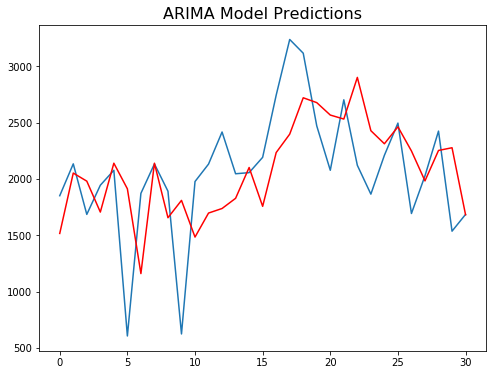

In [ ]:
# plot Predictions
pyplot.figure(figsize=(8,6))
pyplot.title('ARIMA Model Predictions', fontsize=16)

pyplot.plot(test)
pyplot.plot(predictions, color='red')

The prediction, shown in red above, is very close to the pattern of the original data